# Mathematical Thinking Foundations

## Motivation for Differential Equations

An equation involving one dependent variable and its derivatives with respect to one or more independent variables is called a _differential equation_. Many of the general laws of nature—in physics, chemistry, biology, and astronomy—find their most natural expression in the language of differential equations. Applications also abound in mathematics itself, especially in geometry, and in engineering, economics, and many other fields of applied science {cite}'simmons2016differential'.

At the beginning of our mathematical education we learned how to deal with simple equations such as

$$
2 x - 4 = x + 5
$$

and how to solve them (yep, the answer is $x=3$). But later we realized the solution of a equation could be not unique or even it could not exist. In these kind of equation we wanted to find the value of $x$, a number. Now we will try to extend this to equations where we need to find a __function__ $f(x)$. Just like $2x$ or $\cos(x)$ are operations we applied on $x$, we can think that $2 f(x)$ and $\cos(f(x))$ are applied on $f(x)$. However, we will be interested in equations involving the derivatives of $f(x)$.

You will recall that if $y=f(x)$ is a given function, then its derivative $dy/dx$ can be interpreted as the rate of change of $y$ with respect to $$. In any natural process, the variables involved and their rates of change are connected with one another by means of the basic scientific principles that govern the process. When this connection is expressed in mathematical symbols, the result is often a differential equation.

Just for listing a few examples of differential equations:

$$
\frac{dy}{dt} = -k y \\
m\frac{d^2 y}{dt^2} = -k y\\
\frac{dy}{dx} + 2xy = e^{-x^2}\\
\frac{d^2y}{dx^2} - 5 \frac{dy}{dx} + 6y = 0\\
$$

where the dependent variable in each of these equations is $y$, and the independent variable is either $t$ or $x$. The letters $k$ and $m$ represent constants (usually associated a some physical phenomenon).

## General equation

An __ordinary differential equation__ is one in which there is only one independent variable, so that all the derivatives occurring in it are ordinary derivatives.

The __order__ of a differential equation is the order of the highest derivative present. 
A general ordinary differential equation of $n$-th order can be written as 

$$
F\left( x, y, \frac{dy}{dx}, \frac{d^2y}{dx^2}, \ldots, \frac{d^n y}{dx^n} \right) = 0
$$

where $F$ is just an operator. Any adequate theoretical discussion of this equation would have to be based on a careful study of explicitly assumed properties of the function $F$.
Consider the equation

$$
\frac{dy}{dx} = 2 y,
$$

it is simple to verify that the function $y = e^{2x}$ it is a solution. The problem of starting with a differential equation and finding a solution is naturally much more difficult.

There are several solving methods for different types of ordinary differential equations, most of them covered in books. However, sometimes it is hard to find an analytical solution and then it is necessary to apply numerical methods. Next lessons will include examples of numerical applications on ordinary differential equations.

## Numerical methods

Often we can't find an analytical solution, therefore there are some classic approaches for finding numerical solutions.

Single-step Runge–Kutta methods associate a function $\Phi(t, y, h)$ which requires (possibly repeated) function evaluations of $f(t, y)$ but not its derivatives.

In general, single-step Runge–Kutta methods have the form:

$$
y_0 = y(a) \\
y_{k+1} = y_k + h \Phi(t_k ,y_k, h)
$$

where

$$
\Phi(t_k ,y_k, h) = \sum_{r=1}^R c_r K_r, \\
K_1 = f(t, y), \\
K_r = f(t + a_r h, y + h \sum_{s=1}^{r-1}b_{rs} K_s), \\
a_r = \sum_{s=1}^{r-1}b_{rs}, \qquad r=2, 3, \ldots, R
$$

The most well-known Runge–Kutta scheme (from elementary numerical analysis texts) is 4-th order; it has the
form:

$$
y_0 = y(t_0) \\
y_{k+1} = y_k + \frac{h}{6} \left[ K_1 + 2 K_2 + 2 K_3 + K4 \right] \\
K_1 = f(t_k, y_k) \\
K_2 = f\left(t_k + \frac{h}{2}, y_k + \frac{h}{2} K_1 \right) \\
K_3 = f\left(t_k + \frac{h}{2}, y_k + \frac{h}{2} K_2 \right) \\
K_4 = f(t_k + h, y_k + h K_3)
$$
i.e.,
$$
\Phi(t_k, y_k, h) = \frac{h}{6} \left[ K_1 + 2 K_2 + 2 K_3 + K4 \right]
$$

Let's consider the following initial value problem

$$
y^\prime(t) = \frac{t}{9} \cos(2y) + t^2 \\
y(0) = 1
$$

We need a package for scientific computing (`numpy`), plotting (`matplotlib`) and a tool for solving initial values problems with Runge-Kuta methods (`scipy.integrate.solve_ivp`).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

First of all, you need to define a function which takes as arguments $t$ and $y$ and returns the right side of the equation. In this case,
$$
f(t, y) = \frac{t}{9} \cos(2y) + t^2
$$

In [2]:
def f(t, y):
    return t / 9 * np.cos(2 * y) + t ** 2

Now, we need to define the domain where we will solve the equation. Since our initial condition is in $t_0=0$ our domain must include it. And consider, just as an example, the final time as $t_n = 10$ and $h=0.5$ (later you can try smaller values!).

In [3]:
t0 = 0
tn = 10
h = 0.5
t_array = np.arange(t0, tn, h)
t_array

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

Note that `solve_ivp` function only needs $f(t, y)$, a time span (`t_span`) and initial conditions (`y_0`), however, we can include the points where the solution we will be evaluate with `t_eval`.

In [4]:
sol = solve_ivp(f, t_span=[0, 10], y0=[1], t_eval=t_array)

Finally, you can get the solution points with `sol.y` but for plotting we need a flat array (just use `.flatten()` method).

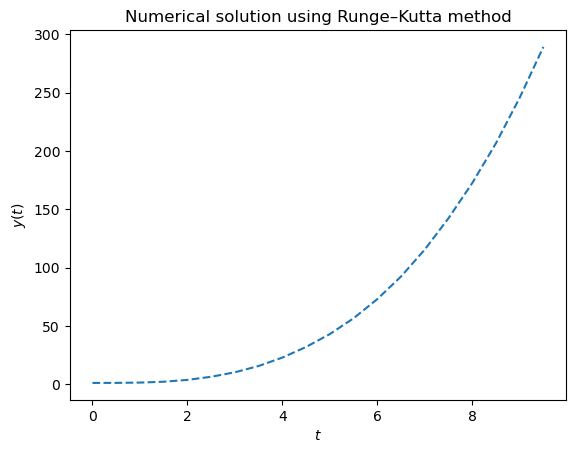

In [5]:
y_sol = sol.y.flatten()
plt.plot(t_array, y_sol, linestyle="dashed")
plt.xlabel(r"$t$")
plt.ylabel(r"$y(t)$")
plt.title("Numerical solution using Runge–Kutta method")
plt.show()